In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import  mean_squared_log_error
from sklearn.model_selection import train_test_split


sns.set() # Definir o tema do Matplotlib como sendo o tema padrão do Seaborn

# Regressão Linear Múltipla
---

## Q1. Previsão do Saldo Médio do Cartão de Crédito

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

Neste case, você deverá aplicar a regressão linear múltipla para estimar o saldo médido do cartão de crédito de clientes de um banco, a partir das demais informações contidas no conjunto de dados (`credit_regression.csv`), os quais são descritos abaixo. Aplique a regressão linear, utilizando o `LinearRegression` do `sklearn` e, também, o `OLS` do `statsmodels`.

* ID - Identificação
* Income - Renda
* Limit - Limite de crédito
* Rating - Score do Serasa
* Age - Idade
* Education - Anos de educação
* Gender - Gênero
* Student - É estudante? (Sim ou Não)
* Married - É casado(a)? (Sim ou Não)
* Ethnicity - Afro-americano, asiático ou branco
* Balance - Saldo médio do cartão de crédito em dólares

> [Link para o download do dataset](https://s3-sa-east-1.amazonaws.com/lcpi/ab0a9e91-89d1-4897-b384-51a86c50b804.csv)

In [2]:
df=pd.read_csv('../datasets/credit_regression.csv')
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400.0,200.500000,115.614301,1.000,100.75000,200.5000,300.25000,400.000
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


In [4]:
df.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [5]:
df.shape

(400, 12)

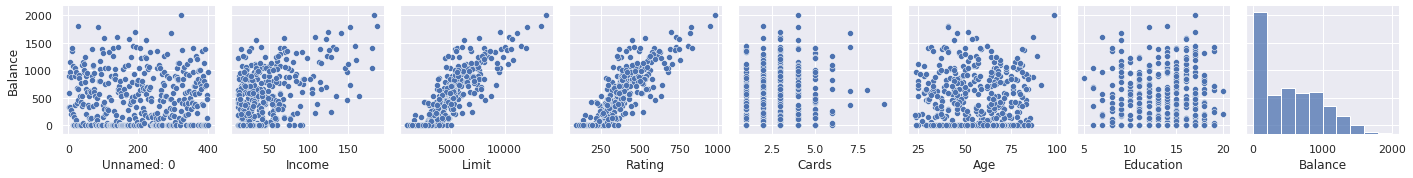

In [6]:
# Dispersão
sns.pairplot(df, y_vars='Balance')

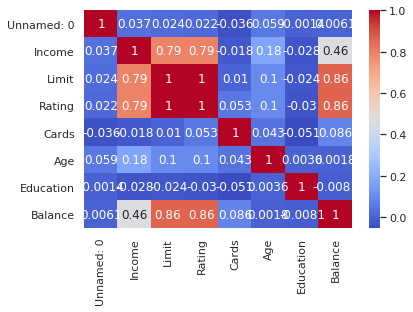

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [15]:
# retirei a coluna de Rating, pq ela é muito correlacionada com a de Limit
df=df.drop('Rating', axis=1)
df.head()

,Unnamed: 0,Income,Limit,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,2,68,16,Male,No,Yes,Caucasian,331


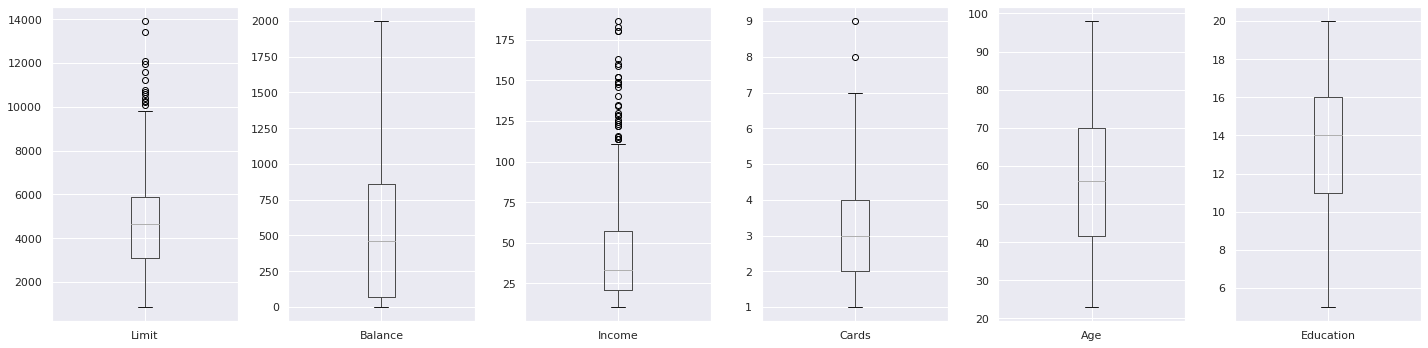

In [16]:
# checando outliers
plt.figure(figsize=(20,5))
plt.subplot(1,6,1)
df[['Limit']].boxplot()
plt.subplot(1,6,2)
df[['Balance']].boxplot()

plt.subplot(1,6,3)
df[['Income']].boxplot()

plt.subplot(1,6,4)
df[['Cards']].boxplot()

plt.subplot(1,6,5)
df[['Age']].boxplot()

plt.subplot(1,6,6)
df[['Education']].boxplot()
plt.tight_layout()

In [17]:
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [18]:
lista_colunas = ['Limit', 'Balance', 'Income', 'Cards','Age','Education','Unnamed: 0']

In [19]:
for coluna in lista_colunas:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    df = df[(df[coluna] >= inf) & (df[coluna] <= sup)]

In [24]:
df.shape

(365, 11)

In [22]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,Unnamed: 0,Income,Limit,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,2,34,11,333,0,0,1,0,1
2,3,104.593,7075,4,71,11,580,0,0,0,1,0
4,5,55.882,4897,2,68,16,331,0,0,1,0,1
5,6,80.180,8047,4,77,10,1151,0,0,0,0,1
6,7,20.996,3388,2,37,12,203,1,0,0,0,0


In [25]:
X=df_dummies.drop(['Balance'],axis=1)
y=df_dummies['Balance']

In [27]:
lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

lr.score(X,y)
x=sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     557.9
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          1.37e-215
Time:                        19:25:30   Log-Likelihood:                -2190.9
No. Observations:                 365   AIC:                             4406.
Df Residuals:                     353   BIC:                             4453.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -423.0062     37.121    -11.395      0.000    -496.013    -350.000
Unnamed: 0              0.0420      0.046      0.913      0.362      -0.048       0.132
Income                 -8.0826      0.312    -25.913      0.000      -8.696      -7.469
Limit                   0.2615      0.004     70.470      0.000       0.254       0.269
Cards                  23.0632      4.024      5.731      0.000      15.149      30.977
Age                    -0.5638      0.313     -1.802      0.072      -1.179       0.052
Education              -2.2311      1.686     -1.323      0.187      -5.548       1.085
Gender_Female         -10.2377     10.520     -0.973      0.331     -30.927      10.451
Student_Yes           427.7863     18.158     23.560      0.000     392.076     463.497
Married_Yes            -4.6551     10.855     -0.429      0.668     -26.005      16.694
Ethnicity_Asian        16.6947     14.864      1.123      0.262     -12.538      45.928
Ethnicity_Caucasian    19.2604     13.003      1.481      0.139      -6.313      44.834
==============================================================================
Omnibus:                       23.548   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.946
Skew:                           0.665   Prob(JB):                     1.41e-06
Kurtosis:                       2.951   Cond. No.                     3.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# de novo removendo o `Unnamed: 0`
X=df_dummies.drop(['Balance','Unnamed: 0'],axis=1)
y=df_dummies['Balance']

lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

lr.score(X,y)
x=sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

In [29]:
lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

lr.score(X,y)
x=sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     613.9
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          8.14e-217
Time:                        19:27:10   Log-Likelihood:                -2191.3
No. Observations:                 365   AIC:                             4405.
Df Residuals:                     354   BIC:                             4447.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -414.5613     35.943    -11.534      0.000    -485.250    -343.872
Income                 -8.0727      0.312    -25.903      0.000      -8.686      -7.460
Limit                   0.2615      0.004     70.482      0.000       0.254       0.269
Cards                  22.8508      4.016      5.689      0.000      14.952      30.750
Age                    -0.5562      0.313     -1.779      0.076      -1.171       0.059
Education              -2.2296      1.686     -1.323      0.187      -5.545       1.086
Gender_Female         -11.2014     10.464     -1.070      0.285     -31.781       9.378
Student_Yes           427.5476     18.151     23.554      0.000     391.849     463.246
Married_Yes            -4.4959     10.852     -0.414      0.679     -25.837      16.846
Ethnicity_Asian        16.7492     14.860      1.127      0.260     -12.476      45.975
Ethnicity_Caucasian    20.1492     12.964      1.554      0.121      -5.346      45.645
==============================================================================
Omnibus:                       23.311   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.633
Skew:                           0.661   Prob(JB):                     1.65e-06
Kurtosis:                       2.949   Cond. No.                     3.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# de novo removendo os campos de acordo com o P_values
X=df_dummies.drop(['Balance','Unnamed: 0','Married_Yes','Ethnicity_Asian',\
                   'Gender_Female','Ethnicity_Caucasian','Education'],axis=1)
y=df_dummies['Balance']

lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

lr.score(X,y)
x=sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1224.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          4.86e-223
Time:                        19:34:49   Log-Likelihood:                -2194.2
No. Observations:                 365   AIC:                             4400.
Df Residuals:                     359   BIC:                             4424.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -438.7501     23.995    -18.285      0.000    -485.938    -391.562
Income         -8.0468      0.312    -25.829      0.000      -8.659      -7.434
Limit           0.2615      0.004     70.619      0.000       0.254       0.269
Cards          22.8137      4.012      5.686      0.000      14.923      30.704
Age            -0.5722      0.311     -1.839      0.067      -1.184       0.040
Student_Yes   425.6298     18.001     23.645      0.000     390.230     461.030
==============================================================================
Omnibus:                       22.823   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.005
Skew:                           0.653   Prob(JB):                     2.25e-06
Kurtosis:                       2.930   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# residuos com media =0
model.resid.mean()
# OK

-5.948975254571837e-12

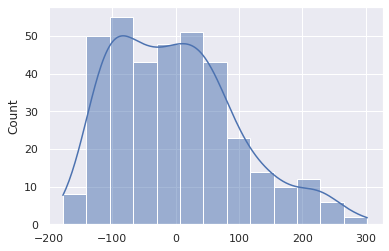

In [38]:
#residuos com dist normal
sns.histplot(model.resid, kde=True)
# NOK

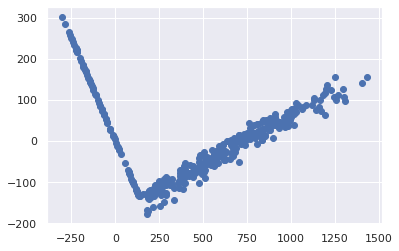

In [39]:
# residuos descorrelacionados
plt.scatter(y_pred, model.resid)
# nok

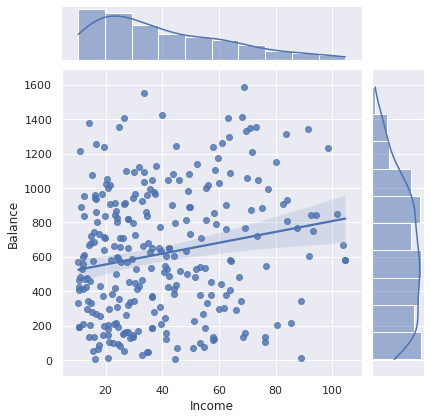

In [153]:
sns.jointplot(x=df_teste['Income'], y=(df_teste['Balance']), kind='reg')


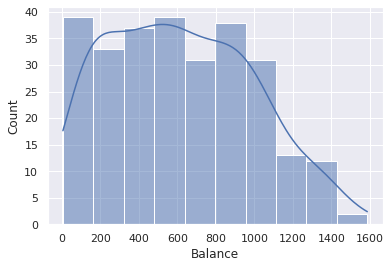

In [160]:
sns.histplot(df_teste['Balance'],kde=True)

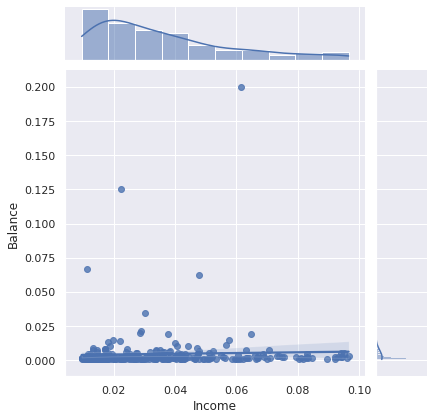

In [157]:
sns.jointplot(x=1/(df_teste['Income']), y=1/(df_teste['Balance']), kind='reg')

#### Testando log log

/home/zgiuliana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


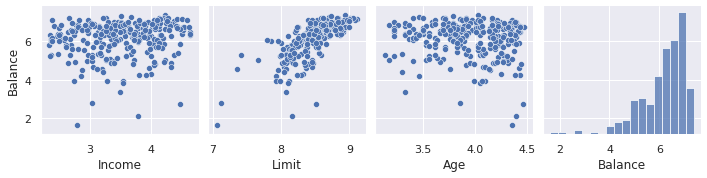

In [168]:
# Dispersão
df_teste=df_dummies.drop(['Unnamed: 0','Married_Yes','Ethnicity_Asian',\
                   'Gender_Female','Ethnicity_Caucasian','Education'],axis=1)
df_teste=df_teste[df_teste['Balance']!=0]
sns.pairplot(np.log(df_teste),x_vars=['Income','Limit','Age','Balance'], y_vars='Balance')

# sns.jointplot(x=np.log(df_dummies['Width']), y=np.log(df_dummies['Weight']), kind='reg')

In [69]:
df_log=df_dummies.copy()
df_log=df_log[df_log['Balance']!=0]

In [70]:
df_log=df_log.drop(['Unnamed: 0','Married_Yes','Ethnicity_Asian',\
                   'Gender_Female','Ethnicity_Caucasian','Education'],axis=1)
df_log.head()

,Income,Limit,Cards,Age,Balance,Student_Yes
0,14.891,3606,2,34,333,0
2,104.593,7075,4,71,580,0
4,55.882,4897,2,68,331,0
5,80.180,8047,4,77,1151,0
6,20.996,3388,2,37,203,0


In [71]:
df_log['Income']=np.log(df_log['Income'])
df_log['Limit']=np.log(df_log['Limit'])
df_log['Balance']=np.log(df_log['Balance'])


In [72]:
X=df_log.drop('Balance',axis=1)
y=df_log['Balance']

lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

x=sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     276.0
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          1.10e-103
Time:                        19:52:12   Log-Likelihood:                -118.78
No. Observations:                 275   AIC:                             249.6
Df Residuals:                     269   BIC:                             271.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -19.3188      0.703    -27.470      0.000     -20.703     -17.934
Income         -0.7912      0.048    -16.439      0.000      -0.886      -0.696
Limit           3.3328      0.092     36.259      0.000       3.152       3.514
Cards           0.0291      0.017      1.716      0.087      -0.004       0.062
Age            -0.0039      0.001     -2.862      0.005      -0.007      -0.001
Student_Yes     1.0014      0.073     13.683      0.000       0.857       1.145
==============================================================================
Omnibus:                      198.647   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3212.300
Skew:                          -2.697   Prob(JB):                         0.00
Kurtosis:                      18.851   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

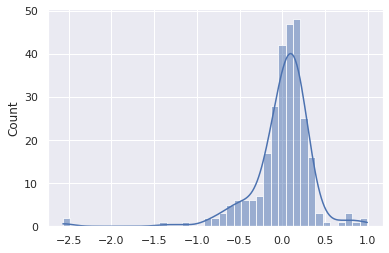

In [73]:
#residuos com dist normal
sns.histplot(model.resid, kde=True)

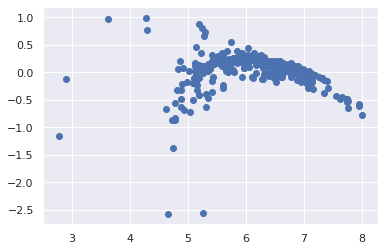

In [74]:
plt.scatter(y_pred, model.resid)

## Q2. Estimando o Preço de Venda de Casas

O arquivo `usa_housing.csv` consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:

* `Avg. Area Income`: Média da renda dos residentes de onde a casa está localizada.
* `Avg. Area House Age`: Média de idade das casas da mesma cidade.
* `Avg. Area Number of Rooms`: Número médio de quartos para casas na mesma cidade.
* `Avg. Area Number of Bedrooms`: Número médio de quartos para casas na mesma cidade.
* `Area Population`: A população da cidade onde a casa está localizada.
* `Price`: Preço de venda da casa.
* `Address`: Endereço da casa.

Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/7cf57d48-ac3d-4748-9d81-5b4d6677fcff.csv) para fazer o download do dataset.

In [75]:
df2=pd.read_csv('../datasets/usa_housing.csv')
df2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [77]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [80]:
df2.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [81]:
df2.shape

(5000, 7)

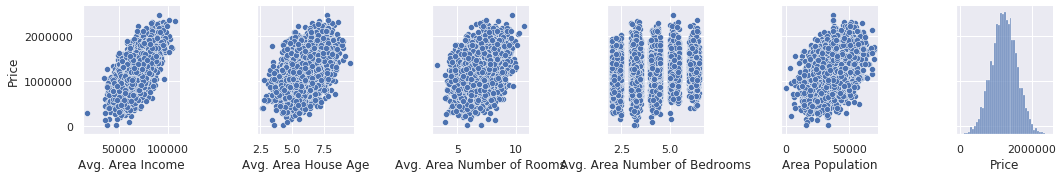

In [85]:
sns.pairplot(df2,y_vars='Price')

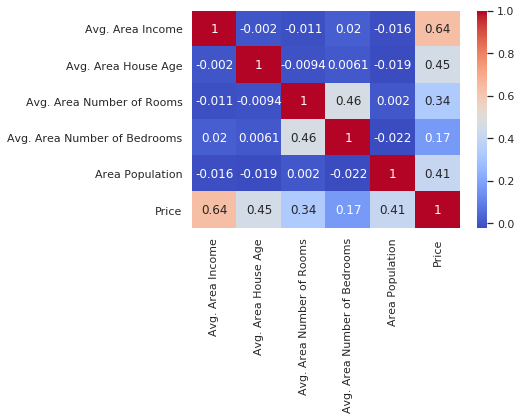

In [92]:
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')

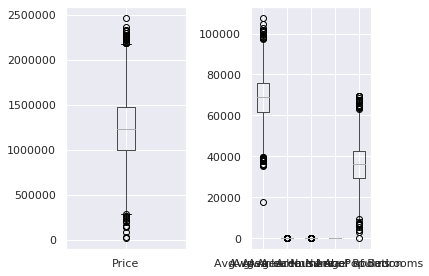

In [98]:
plt.subplot(1,2,1)
df2[['Price']].boxplot()
plt.subplot(1,2,2)
df2.drop('Price',axis=1).boxplot()
plt.tight_layout()

In [100]:
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [101]:
lista_colunas = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms','Area Population','Price']

In [102]:
for coluna in lista_colunas:
    inf, sup = calc_min_and_max_range(df2[coluna])
    
    df2 = df2[(df2[coluna] >= inf) & (df2[coluna] <= sup)]

In [99]:
df2.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [104]:
df2=df2.drop('Address',axis=1)

In [105]:
X=df2.drop('Price',axis=1)
y=df2['Price']

lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

x=sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     9899.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:05:30   Log-Likelihood:                -62827.
No. Observations:                4856   AIC:                         1.257e+05
Df Residuals:                    4850   BIC:                         1.257e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.622e+06   1.81e+04   -144.666      0.000   -2.66e+06   -2.59e+06
Avg. Area Income                21.5338      0.141    152.974      0.000      21.258      21.810
Avg. Area House Age           1.654e+05   1498.533    110.404      0.000    1.63e+05    1.68e+05
Avg. Area Number of Rooms     1.199e+05   1661.286     72.183      0.000    1.17e+05    1.23e+05
Avg. Area Number of Bedrooms  1816.9537   1323.904      1.372      0.170    -778.498    4412.406
Area Population                 15.0059      0.150     99.977      0.000      14.712      15.300
==============================================================================
Omnibus:                        6.239   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.492
Skew:                           0.016   Prob(JB):                       0.0642
Kurtosis:                       2.838   Cond. No.                     9.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
X=df2.drop(['Price','Avg. Area Number of Bedrooms'],axis=1)
y=(df2['Price'])

lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

x=sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.237e+04
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:18:21   Log-Likelihood:                -62828.
No. Observations:                4856   AIC:                         1.257e+05
Df Residuals:                    4851   BIC:                         1.257e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.622e+06   1.81e+04   -144.699      0.000   -2.66e+06   -2.59e+06
Avg. Area Income             21.5384      0.141    153.037      0.000      21.262      21.814
Avg. Area House Age        1.655e+05   1498.612    110.411      0.000    1.63e+05    1.68e+05
Avg. Area Number of Rooms   1.21e+05   1469.020     82.356      0.000    1.18e+05    1.24e+05
Area Population              15.0005      0.150     99.966      0.000      14.706      15.295
==============================================================================
Omnibus:                        5.926   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.245
Skew:                           0.016   Prob(JB):                       0.0726
Kurtosis:                       2.842   Cond. No.                     9.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
# residuos com media =0
model.resid.mean()
# OK

-2.2605573221476507e-09

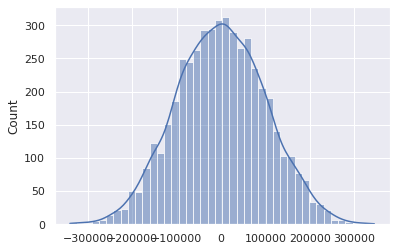

In [138]:
#residuos com dist normal
sns.histplot(model.resid, kde=True)
# OK

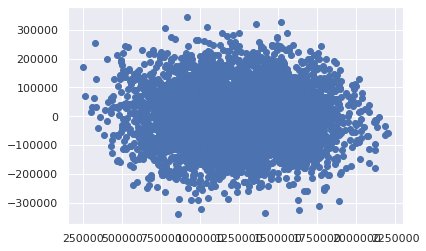

In [139]:
# residuos descorrelacionados
plt.scatter(y_pred, model.resid)
# OK

### Dividindo treino e teste

In [140]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3)

In [141]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
y_pred=lr.predict(X_test)

In [143]:
r2_score(y_test,y_pred)

0.9061105074815355

In [144]:
mean_squared_error(y_test,y_pred)

10665678805.993595